In [ ]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
!pip install reliability
from reliability.Fitters import Fit_Weibull_2P
from reliability.Fitters import Fit_Gamma_2P
from reliability.Fitters import Fit_Lognormal_2P
from reliability.Fitters import Fit_Exponential_1P
from reliability.Fitters import Fit_Normal_2P
from reliability.Fitters import Fit_Weibull_3P
from reliability.Fitters import Fit_Loglogistic_2P
from reliability.Fitters import Fit_Gamma_3P
from reliability.Fitters import Fit_Lognormal_3P
from reliability.Fitters import Fit_Loglogistic_3P
from reliability.Fitters import Fit_Gumbel_2P
from reliability.Fitters import Fit_Exponential_2P
from reliability.Fitters import Fit_Everything

from reliability.Other_functions import make_right_censored_data, histogram

In [ ]:
import pandas as pd
df = pd.read_csv("owid-covid-data.csv")
df.head() 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
import seaborn as sns
df2 = df[df["location"] == "India"][62:123]
#sns.heatmap(df2.isnull())

df2.dropna(axis=1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30046,IND,Asia,India,2020-04-01,1998.0,601.0,191.571,58.0,23.0,6.571,1.448,0.436,0.139,0.042,0.017,0.005,2.10,2776.0,0.002,0.069,14.5,samples tested,100.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30047,IND,Asia,India,2020-04-02,2543.0,545.0,259.429,72.0,14.0,7.429,1.843,0.395,0.188,0.052,0.010,0.005,2.07,3076.0,0.002,0.084,11.9,samples tested,100.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30048,IND,Asia,India,2020-04-03,2567.0,24.0,240.000,72.0,0.0,7.429,1.860,0.017,0.174,0.052,0.000,0.005,2.03,5937.0,0.004,0.040,24.7,samples tested,100.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30049,IND,Asia,India,2020-04-04,3082.0,515.0,299.286,86.0,14.0,8.857,2.233,0.373,0.217,0.062,0.010,0.006,2.01,6984.0,0.005,0.043,23.3,samples tested,100.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30050,IND,Asia,India,2020-04-05,3588.0,506.0,366.286,99.0,13.0,10.286,2.600,0.367,0.265,0.072,0.009,0.007,1.99,7870.0,0.006,0.047,21.5,samples tested,100.00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30102,IND,Asia,India,2020-05-27,158086.0,7293.0,6579.714,4534.0,190.0,157.143,114.555,5.285,4.768,3.285,0.138,0.114,1.28,104253.0,0.076,0.063,15.8,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30103,IND,Asia,India,2020-05-28,165386.0,7300.0,6737.143,4711.0,177.0,161.000,119.845,5.290,4.882,3.414,0.128,0.117,1.27,106602.0,0.077,0.063,15.8,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30104,IND,Asia,India,2020-05-29,173491.0,8105.0,6956.714,4980.0,269.0,179.143,125.718,5.873,5.041,3.609,0.195,0.130,1.27,109201.0,0.079,0.064,15.7,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30105,IND,Asia,India,2020-05-30,181827.0,8336.0,7200.571,5185.0,205.0,188.143,131.758,6.041,5.218,3.757,0.149,0.136,1.27,110972.0,0.080,0.065,15.4,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

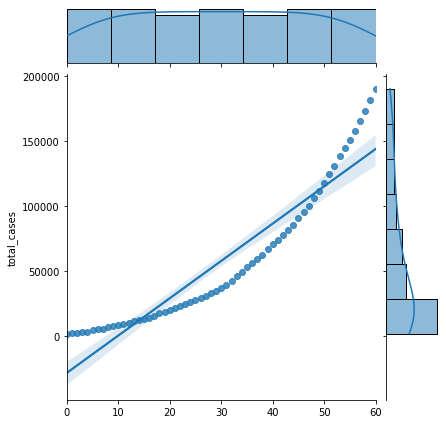

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
# Create a jointplot similar to the JointGrid 
sns.jointplot(x = df2.index - 29333,
        y ="total_cases",
        kind='reg',
        data=df2)
plt.savefig("regression.png")
files.download("regression.png")
plt.show()
plt.clf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

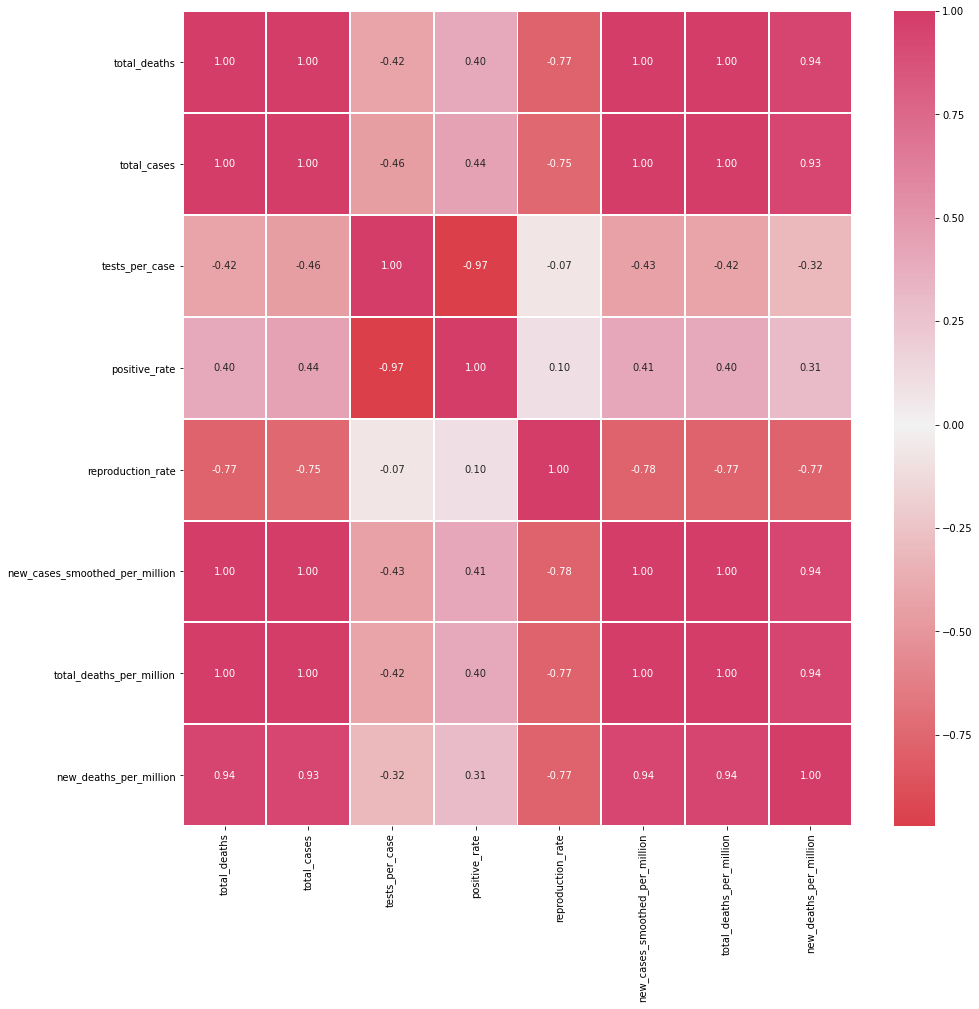

In [ ]:
import matplotlib.pyplot as plt
df2_new = df2[["total_deaths",	"total_cases","tests_per_case","positive_rate","reproduction_rate","new_cases_smoothed_per_million"	,"total_deaths_per_million","new_deaths_per_million"	]]

# Create the correlation matrix
corr = df2_new.corr()

cmap = sns.diverging_palette(h_neg=10,h_pos=360,as_cmap=True)
fig, ax = plt.subplots(figsize=(15,15))

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f", ax = ax)
plt.savefig("heatplot.png")
files.download("heatplot.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

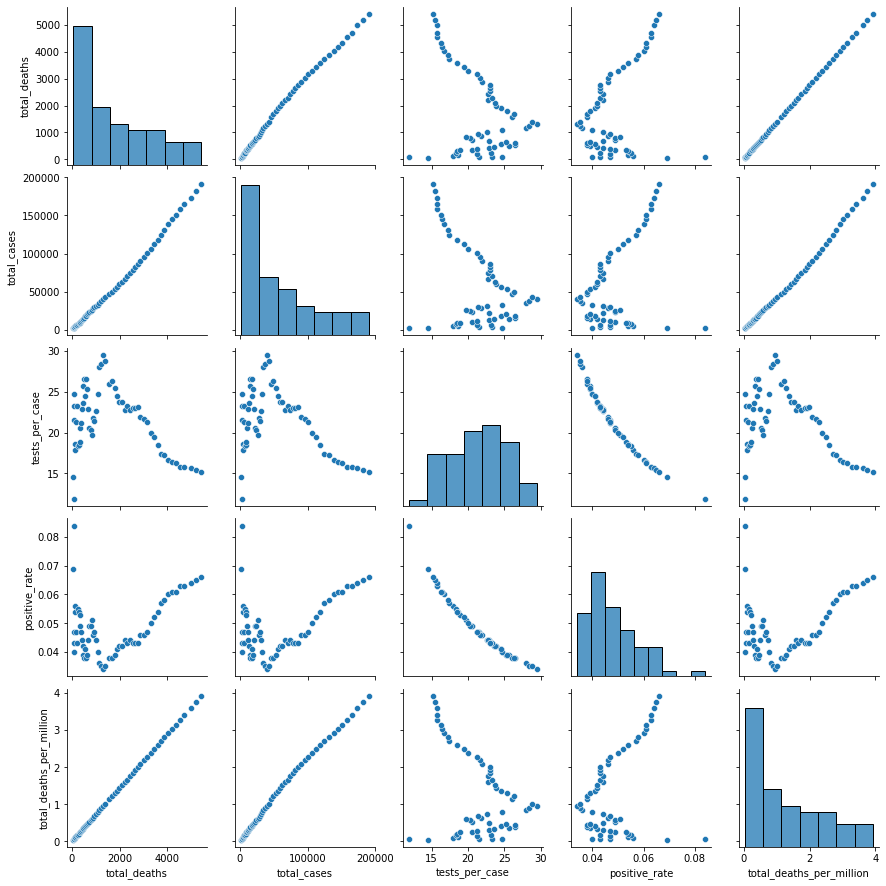

In [ ]:
df3_new = df2[["total_deaths",	"total_cases","tests_per_case","positive_rate"	,"total_deaths_per_million"]]
sns.pairplot(df3_new)
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png")

In [ ]:
df3_new = df2[["positive_rate","reproduction_rate", 'population_density']
sns.pairplot(df3_new)

# New Section